In [97]:
import numpy as np
import pandas as pd
import os
from PIL import Image

In [98]:
root_dir = '../../data/komonjo_experiment/200003076/'
image_dir = root_dir + 'training_data/images/'
annotation_data_path = '../../data/200003076/200003076_coordinate.csv'
annotation_data = pd.read_csv(annotation_data_path)
output_dir = root_dir + 'training_data/one_hot_x1.0/'

In [99]:
def get_utf16_hex_and_bounding_box_list_from_csv(image_name, annotation_csv):
    image_name, _ = image_name.split('.')
    annotation_data_for_the_image = annotation_csv[annotation_csv.Image == image_name]
    utf16_hex_and_bounding_box_list = annotation_data_for_the_image[['Unicode', 
                                                                   'X', 'Y', 'Width', 'Height']].values.tolist()
    return utf16_hex_and_bounding_box_list

In [100]:
# if unicode means hiragana return 1 else if kanji return 2
def get_channel_index_from_utf16_hex(char_utf16_hex):
    min_hiragana_int = int('3041', 16) # ぁ
    max_hiragana_int = int('309D', 16) # ゝ
    
    char_int = int(char_utf16_hex[2:], 16)
    
    if min_hiragana_int <= char_int and char_int <= max_hiragana_int:
        return 1
    else:
        return 2

In [101]:
def revise_bounding_box_by_coefficient(X, Y, Width, Height, λ=1.0):
    shrink_rate = 1.0-λ
    shrink_Width = shrink_rate * Width
    shrink_Height = shrink_rate * Height
        
    X = round(X + 0.5*shrink_Width)
    Y = round(Y + 0.5*shrink_Height)
    Width = round(Width - shrink_Width)
    Height = round(Height - shrink_Height)
    return X, Y, Width, Height

In [143]:
def make_one_hot_label_for_a_page(image_dir, image_name, annotation_csv, λ=1.0):
    image_size = Image.open(image_dir + image_name).size
    one_hot_label_np = np.zeros((image_size[1], image_size[0], 3))
    utf16_hex_and_bounding_box_list = get_utf16_hex_and_bounding_box_list_from_csv(image_name, annotation_csv)
    
    for utf16_hex, X, Y, Width, Height in utf16_hex_and_bounding_box_list:
        Channel = get_channel_index_from_utf16_hex(utf16_hex)
        X, Y, Width, Height = revise_bounding_box_by_coefficient(X, Y, Width, Height, λ)
        one_hot_label_np[Y:Y+Height, X:X+Width, Channel] = 1
    
    return (one_hot_label_np*255).astype(np.uint8)

(3138, 2400, 3)


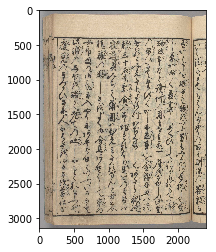

In [144]:
import matplotlib.pyplot as plt
image_name = os.listdir(image_dir)[3]
original_image = np.array(Image.open(image_dir + image_name))
plt.imshow(original_image)
print(original_image.shape)

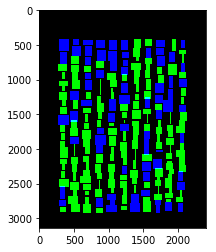

In [145]:
label = make_one_hot_label_for_a_page(image_dir, image_name, annotation_data, 1.0)
plt.imshow(label)

In [142]:
label.max()

255

1938 137 37 41


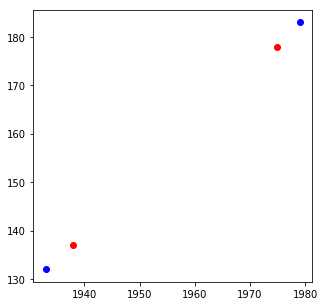

In [134]:
x,y,w,h = 1933, 132, 46, 51
xr, yr, wr, hr = revise_bounding_box_by_coefficient(x, y, w, h, 0.8)
print(xr, yr, wr, hr)
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(x, y, 'bo')
plt.plot(x+w, y+h, 'bo')
plt.plot(xr,yr, 'ro')
plt.plot(xr+wr, yr+hr, 'ro')
plt.show()

In [83]:
get_channel_index_from_utf16_hex('U+3072')

1

In [84]:
'\u3072'

'ひ'

In [48]:
0x3041

12353

In [25]:
a = os.listdir(image_dir)[1]
get_unicode_and_bounding_box_list_from_csv(a, annotation_data)

[['U+3092', 2027, 436, 103, 79],
 ['U+7D50', 2037, 530, 85, 120],
 ['U+3072', 2034, 660, 86, 90],
 ['U+3055', 2058, 745, 33, 59],
 ['U+3052', 2052, 828, 76, 111],
 ['U+7ACB', 2038, 943, 79, 94],
 ['U+6728', 2039, 1060, 65, 95],
 ['U+306E', 2011, 1161, 105, 75],
 ['U+767D', 2035, 1242, 63, 86],
 ['U+6885', 2014, 1343, 87, 102],
 ['U+306B', 2031, 1452, 68, 82],
 ['U+540D', 2006, 1544, 94, 124],
 ['U+3092', 2026, 1676, 84, 92],
 ['U+306A', 2049, 1764, 61, 78],
 ['U+304F', 2058, 1839, 50, 103],
 ['U+9CE5', 2026, 1937, 103, 130],
 ['U+3092', 2040, 2074, 85, 71],
 ['U+3068', 2078, 2164, 35, 84],
 ['U+307E', 2067, 2254, 37, 65],
 ['U+3089', 2068, 2315, 27, 96],
 ['U+305B', 2027, 2403, 96, 76],
 ['U+306C', 2029, 2495, 98, 75],
 ['U+304D', 2076, 2567, 34, 108],
 ['U+3042', 2052, 2674, 69, 66],
 ['U+3057', 2104, 2727, 15, 91],
 ['U+306E', 2058, 2820, 69, 53],
 ['U+306C', 1868, 423, 105, 81],
 ['U+3081', 1882, 517, 57, 66],
 ['U+308A', 1900, 584, 53, 95],
 ['U+9053', 1865, 687, 99, 121],
 ['U+4E2

In [19]:
image_name, _ = os.listdir(image_dir)[0].split('.')
annotation_data[annotation_data.Image == image_name].Unicode.tolist()

['U+5168',
 'U+76DB',
 'U+6B4C',
 'U+66F8',
 'U+7FBD',
 'U+7E54',
 'U+7537',
 'U+306F',
 'U+672C',
 'U+5967',
 'U+5D8B',
 'U+306E',
 'U+6642',
 'U+82B1',
 'U+51FA',
 'U+5973',
 'U+90CE',
 'U+3082',
 'U+8863',
 'U+88DD',
 'U+3064',
 'U+304D',
 'U+3057',
 'U+3084',
 'U+308C',
 'U+3066',
 'U+58A8',
 'U+7E6A',
 'U+306B',
 'U+6E90',
 'U+6C0F',
 'U+7D0B',
 'U+6240',
 'U+3082',
 'U+3061',
 'U+3044',
 'U+3055',
 'U+304F',
 'U+306A',
 'U+3089',
 'U+3079',
 'U+3066',
 'U+8896',
 'U+53E3',
 'U+3082',
 'U+9ED2',
 'U+304F',
 'U+88FE',
 'U+3082',
 'U+5C71',
 'U+9053',
 'U+306B',
 'U+53D6',
 'U+305E',
 'U+304B',
 'U+3057',
 'U+305D',
 'U+308C',
 'U+8FC4',
 'U+306F',
 'U+76EE',
 'U+305B',
 'U+304D',
 'U+7DE8',
 'U+7B20',
 'U+7566',
 'U+8DB3',
 'U+888B',
 'U+306B',
 'U+7D05',
 'U+306E',
 'U+7D10',
 'U+4ECA',
 'U+306E',
 'U+7D20',
 'U+8DB3',
 'U+898B',
 'U+5408',
 'U+7B11',
 'U+3057',
 'U+304D',
 'U+4E8B',
 'U+3082',
 'U+3042',
 'U+3064',
 'U+3066',
 'U+904E',
 'U+4F8D',
 'U+308B',
 'U+4E16',
 'U+306F',

In [ ]:
λ = 1.0
def make_label_one_hot(image_dir, image_name, annotation_csv):
    image_shape = io.

In [3]:
λ = 1.0
# 画像の置いてあるディレクトリ名 image_dir、画像のファイル名 image_name、アノテーションデータのcsvファイル annotation_csv、
# バウンディングボックスから標準偏差を抽出するときに用いるkシグマ区間のkを表す整数 k_sigma、を引数に取り、
# ラベルを生成してnp.array形式で返す関数
def make_label_one(image_dir, image_name, annotation_csv):
    image_shape = io.imread(image_dir + image_name).shape[:2]
    label_np = np.zeros(image_shape)

    image_name, _ = image_name.split('.')
    annotation_csv_for_image = annotation_csv[annotation_csv.Image == image_name]
    
    if len(annotation_csv_for_image) == 0:
        return label_np
    
    annotation_data_bounding_box = annotation_csv_for_image[['X', 'Y', 'Width', 'Height']].values.tolist()
    
    for X, Y, Width, Height in annotation_data_bounding_box:
        Height = round(Height*λ)
        Width = round(Width*λ)
        for i in range(Y, Y+Height):
            for j in range(X, X+Width):
                label_np[i][j] = 1
                        
    return label_np

In [ ]:
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
files = os.listdir(image_dir)

In [5]:
for f in files:
    label = make_label_one(image_dir, f, annotation_data)
    io.imsave(output_dir + f, label)

/home/kaito/.local/lib/python3.5/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00082_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00057_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00133_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00177_2.jpg is a low contrast image
  warn('%s is 

/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00105_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00143_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00155_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00051_2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/kaito/.local/lib/python3.5/site-packages/skimage/io/_io.py:140: UserWarning: ../../data/200003076/labels/one_x1.0/200003076_00035_2.jpg is a low contr